# 支援向量機（Support Vector Machine）

## 實際操作

### **Part 1 SVM分類實作：手寫數字辨識**

這是我最喜歡的應用例子，是諾貝爾物理學獎講座中聽到的，啟發了我對AI的興趣（雖然講座中提到辨識方法是神經網路）    
資料集來源：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

總共有1797筆資料，每筆資料都是8x8的灰階圖片，有0~9共10種數字

我們的目標是使用scikit-learn的手寫數字圖像建立SVM分類模型並分類圖像
>這部分是我自己操作的，有一些探索與嘗試的部分

In [310]:
#1 載入資料集
from sklearn.datasets import load_digits

digits = load_digits()

# 提取輸入特徵和輸出
X = digits.data
y = digits.target

print('X shape: ', X.shape)

X shape:  (1797, 64)


### 資料視覺化

可以先看看資料長什麼樣子

<Figure size 640x480 with 0 Axes>

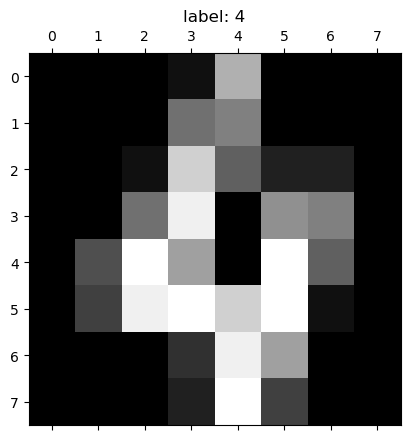

In [313]:
#2 視覺化資料
import matplotlib.pyplot as plt

index = 4
plt.gray()
plt.matshow(X[index].reshape(8,8))
plt.title(f'label: {y[index]}')
plt.show()

### 資料前處理

接著進行資料前處理，這裡要做的是降維和標準化：
- 降維：降到二維以方便在平面圖上顯示SVM的訓練結果，用t-SNE進行（從64維降到2維）
- 標準化：確保各個特徵的貢獻相同，加快收斂速度，提高效率

X_embedded shape:  (1797, 2)


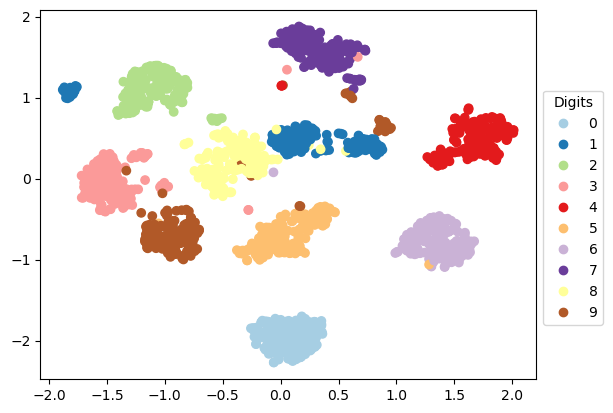

In [316]:
#3 資料前處理
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# t-SNE降維
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

# 標準化
scaler = StandardScaler()
X_embedded = scaler.fit_transform(X_embedded)

# 查看結果
print('X_embedded shape: ', X_embedded.shape)

# 繪製結果
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1, 0.8))
plt.show()

t-SNE又一次很棒的把不同特徵分開了，看起來比較容易被分錯的應該是在1和8那邊（中間那一團）

### 建立視覺化用的函式

為了將SVM模型視覺化，先建立兩個函式
- `make_meshgrid()`：用於繪製網格點數據（`x`, `y`：基於x, y軸的網格數據、`h`：網格的步長）
- `plot_contours()`：用於繪製超平面（`ax`：matplotlib axes物件、`clf`：分類器、`xx`, `yy`：ndarray、`params`：plt繪圖的參數樣式）

In [320]:
#4 視覺化決策邊界函數
import numpy as np

def Make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def Plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower', **params)

這裡之所以不使用PCA，而用t-SNE就是因為我想用這兩個函式繪製決策邊界，搭配原始資料觀察SVM在不同核函數時的決策方式

### 建立SVM分類器

接著就可以來嘗試建立各種不同的SVM分類器。

分別嘗試看看不同的核函數：
- linearSVC
- SVC linear kernel
- SVC polynomial kernel
- Sigmoid
- SVC RBF kernel

### LinearSVC模型

In [325]:
#5 建立LinearSVC模型
from sklearn import svm

# 建立模型
linear_svc_model=svm.LinearSVC(C=1, max_iter=1000)

# 訓練模型
linear_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = linear_svc_model.score(X_embedded, y)

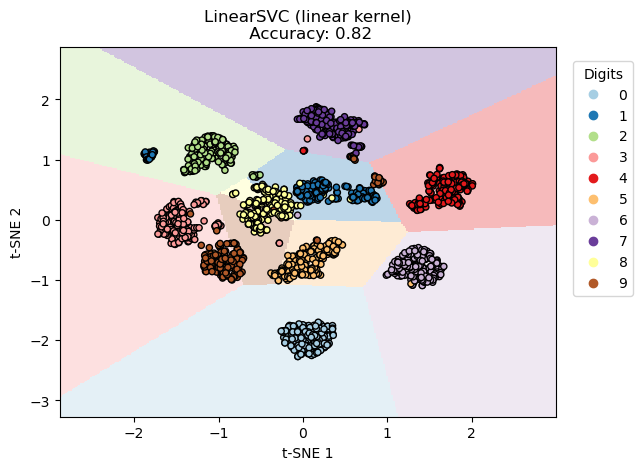

In [327]:
#6 視覺化LinearSVC結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, linear_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'LinearSVC (linear kernel)\n Accuracy: {accuracy:.2f}')
plt.show()

結果可以發現：
- 整體達到了82%的準確度，以這個超級清楚分割的分布來講挺不好的
- 邊界都是直線（線性核函數）
- 主要問題出在數字8的地方  

### SVC linear kernel模型

In [331]:
#7 建立SVC Linear kernel模型
# 建立模型
linear_svc_model=svm.SVC(kernel='linear', C=1)

# 訓練模型
linear_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = linear_svc_model.score(X_embedded, y)

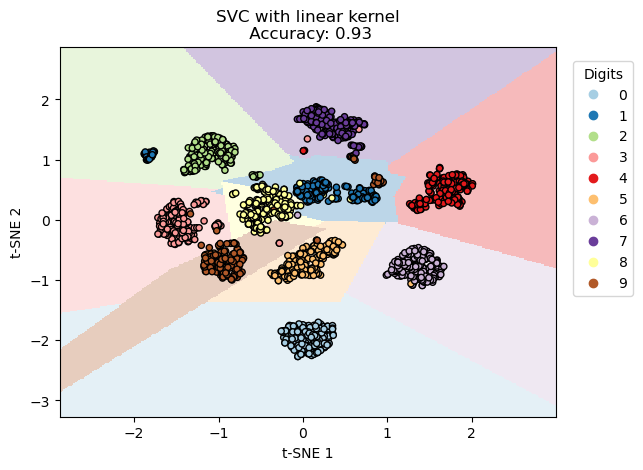

In [333]:
#8 視覺化SVC Linear kernel結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, linear_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'SVC with linear kernel\n Accuracy: {accuracy:.2f}')
plt.show()

結果可以發現：
- 同樣是線性方法，SVC(linear kernel)達到了93%的準確度（高了超多!）
- 這樣的差異和兩者的特性有關
- 現在主要的問題在左上角的數字1
- 好像其實不完全是線性的，左下角9號的邊界有一小塊曲線的樣子

### SVC polynomial kernel模型

In [337]:
#9 建立SVC Polynomial kernel模型
# 建立模型
poly_svc_model=svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)

# 訓練模型
poly_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = poly_svc_model.score(X_embedded, y)

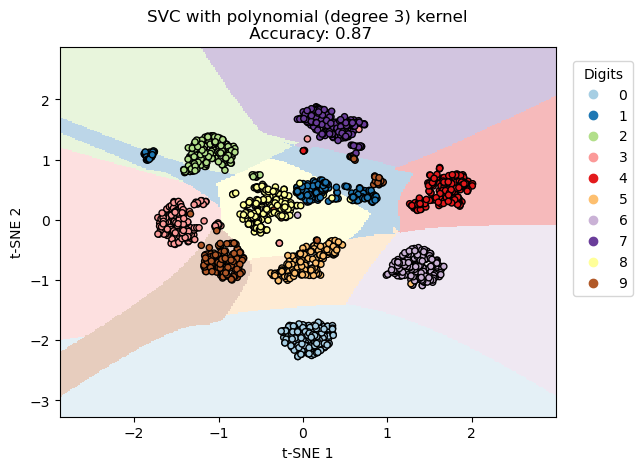

In [339]:
#10 視覺化SVC Polynomial kernel結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, poly_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'SVC with polynomial (degree {poly_svc_model.degree}) kernel\n Accuracy: {accuracy:.2f}')
plt.show()

結果可以發現：
- 準確度反而沒有linear kernel高
- 左上角的數字1被抓出來了
- 決策邊界變成曲線了，但大多數的邊界分布相同
- 現在的問題是中間的數字1有一團被分到數字8去了

但是直覺上，從線性變成非線性邊界準確度應該要變高才對，我想試著改變C值看看

### SVC polynomial kernel（調整C值）

In [343]:
#11 再試一次SVC Polynomial kernel模型（改變C值=200）
# 建立模型
poly_svc_model=svm.SVC(kernel='poly', degree=3, gamma='auto', C=200)

# 訓練模型
poly_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = poly_svc_model.score(X_embedded, y)

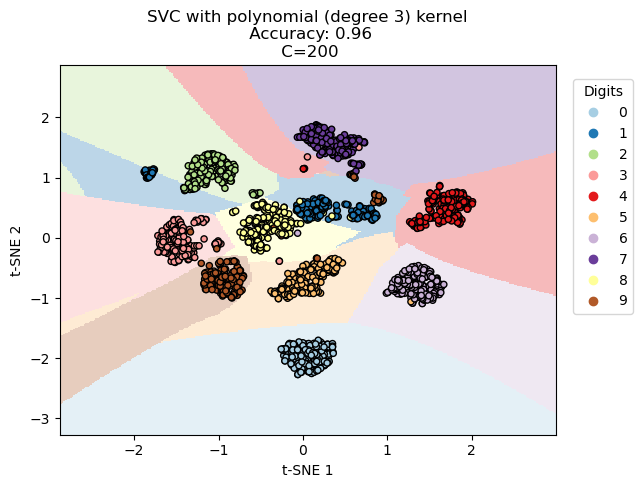

In [345]:
#12 視覺化新的SVC Polynomial kernel結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, poly_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'SVC with polynomial (degree {poly_svc_model.degree}) kernel\n Accuracy: {accuracy:.2f}\n C={poly_svc_model.C}')
plt.show()

結果可以發現：
- 準確度高了9%
- 原本被歸到8那邊的一團1有被正確分類了
- 現在剩下的比較明顯的問題是左上角一小團2跑到1裡面和中間一小團9跑到1裡面

### SVC Sigmoid kernel模型

In [349]:
#13 建立SVC Sigmoid kernel模型
# 建立模型
sigmoid_svc_model=svm.SVC(kernel='sigmoid', gamma='auto', C=1)

# 訓練模型
sigmoid_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = sigmoid_svc_model.score(X_embedded, y)

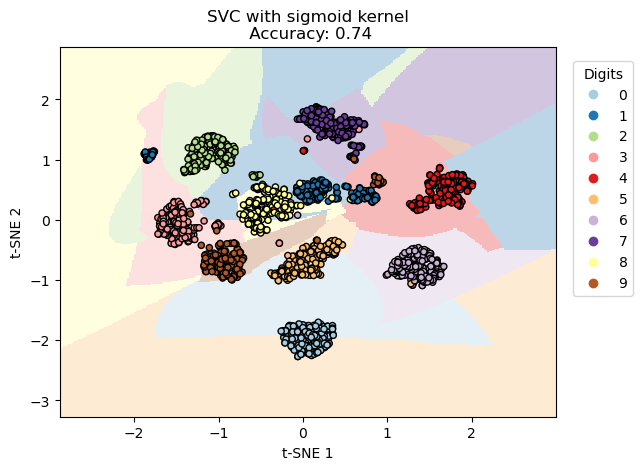

In [351]:
#14 視覺化SVC Sigmoid kernel結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, sigmoid_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'SVC with sigmoid kernel\n Accuracy: {accuracy:.2f}')
plt.show()

結果可以發現：
- 準確度只有74%
- 決策邊界非常混亂
- 有幾團很明顯的被分錯了，（左邊的一小團1和中間的一團1）
- 在同樣參數條件下Sigmoid對這個資料集的表現最差（可能是因為Sigmoid的輸出值介於0~1，對於複雜的非線性關係較難區分）

### SVC RBF kernel模型

In [355]:
#15 建立SVC RBF kernel模型
# 建立模型
rbf_svc_model=svm.SVC(kernel='rbf', gamma='auto', C=1)

# 訓練模型
rbf_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = rbf_svc_model.score(X_embedded, y)

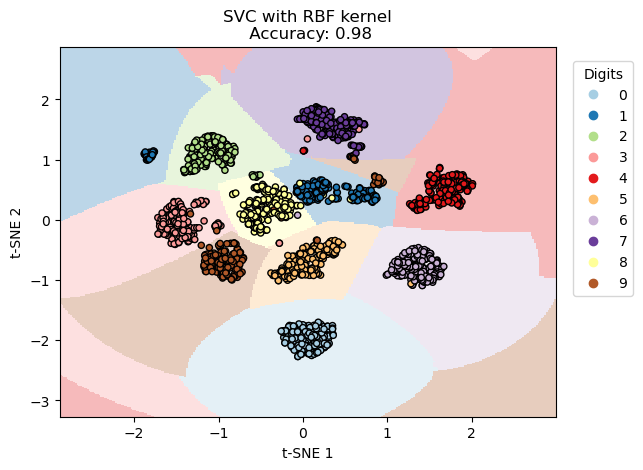

In [357]:
#16 視覺化SVC RBF kernel結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, rbf_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'SVC with RBF kernel\n Accuracy: {accuracy:.2f}')
plt.show()

結果可以發現：
- RBF真的是最猛的，準確度98%（調過C值的polynomial都沒有它高）
- 幾乎所有一團一團的部分都被正確分類了，只剩下單個的

那我很好奇有沒有辦法透過調整C值讓準確度更高

In [360]:
#17 建立SVC RBF kernel模型（改變C值=100）
# 建立模型
rbf_svc_model=svm.SVC(kernel='rbf', gamma='auto', C=100)

# 訓練模型
rbf_svc_model.fit(X_embedded, y)

# 計算準確率
accuracy = rbf_svc_model.score(X_embedded, y)

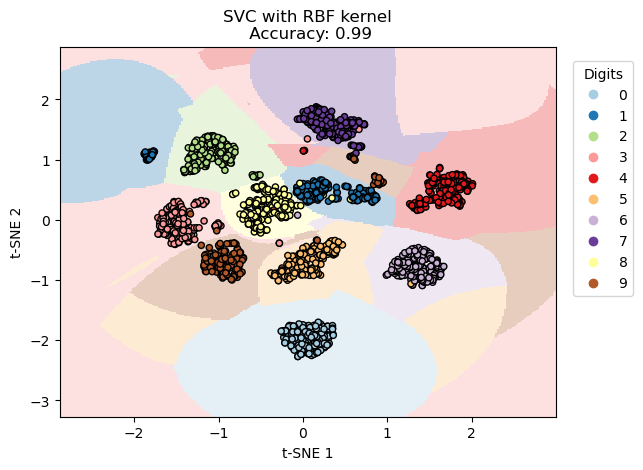

In [362]:
#18 視覺化新的SVC RBF kernel結果
# 繪製決策邊界
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]
xx, yy = Make_meshgrid(X0, X1)
Plot_contours(plt, rbf_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.3)

# 繪製散布圖
scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.17, 0.98))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'SVC with RBF kernel\n Accuracy: {accuracy:.2f}')
plt.show()

結果可以發現：
- 調整C值後，準確度來到99%，幾乎所有的點都被正確分類了
- 現在只有極少數資料點重疊在大量另一群的資料點中的情形沒有被正確歸類了

### **Part 2 SVR迴歸實作：薪資預測**

這次使用Kaggle上的資料集  
資料集來源：https://www.kaggle.com/datasets/harsh45/random-salary-data-of-employes-age-wise

總共有30筆資料，每筆資料包含一位員工的工作經驗（YearsEperience）和薪資（Salary）

輸入特徵：  
- YearsExperience（工作經驗）

輸出：
- Salary（薪資）

我們的目標是建立SVR模型探討工作經驗對薪資的影響（怎麼看都是超級正相關）  

In [367]:
#1 載入資料集
import pandas as pd

df_data = pd.read_csv('./Dataset/Salary_Data.csv')

# 提取輸入、輸出
X = df_data[['YearsExperience']].values
y = df_data['Salary'].values

### 資料視覺化

養成資料視覺化的習慣，先觀察一下兩個類別的資料分布

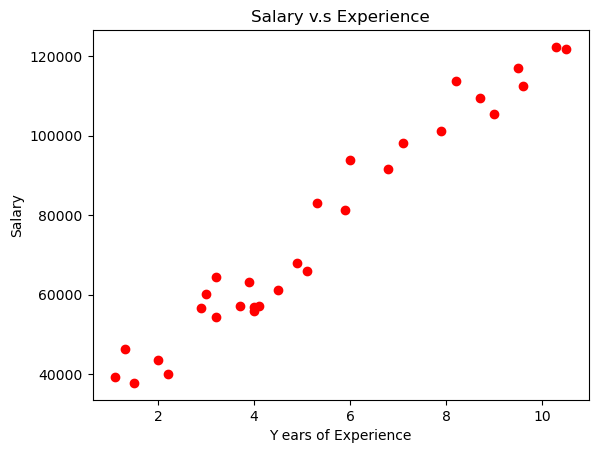

In [374]:
#2 視覺化資料
plt.scatter(X, y, color = 'red')
plt.title("Salary v.s Experience")
plt.xlabel('Y ears of Experience')
plt.ylabel('Salary')
plt.show()

結果可以發現：
- 輸入和輸出之間真的呈現簡單的線性關係，可以考慮用簡單的線性迴歸模型進行迴歸預測

In [377]:
#3 分割資料
from sklearn.model_selection import train_test_split

# 以測試3訓練7的比例分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of training set X: ', X_train.shape)
print('Shape of testing set X: ', X_test.shape)

Shape of training set X:  (21, 1)
Shape of testing set X:  (9, 1)


### 尋找超參數

這次試著使用網格搜索尋找SVR模型的超參數

In [382]:
#4 用網格搜索合適的SVR模型超參數
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# 定義參數範圍
param_grid = {'C': [1, 10, 50, 100, 400, 800], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# 建立模型
svr_model = SVR()

# 進行網格搜索
svr_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, refit=True, return_train_score=False)
svr_search.fit(X_train, y_train)

# 提取最佳分數和參數
best_score = svr_search.best_score_
best_params = svr_search.best_params_
df_score = pd.DataFrame([{'model': 'SVR', 'best_score': best_score, 'best_params': best_params}], columns=['model', 'best_score', 'best_params'])
print(df_score.to_string(index=False))

model  best_score                    best_params
  SVR     0.83528 {'C': 800, 'kernel': 'linear'}


我們在我們給定的範圍內得到了最佳參數：
- `C` = 800
- `kernel` = linear

### 建立並訓練模型

找到最佳超參數後，就可以建立SVR模型了

In [386]:
#5 用找到的最佳組合建立SVR模型
from sklearn import svm

# 建立模型
linear_model = svm.SVR(C=800, kernel='linear')

# 訓練模型
linear_model.fit(X_train, y_train);

### 評估訓練結果

用MSE來查看訓練結果，並將迴歸直線繪製出來看看

In [411]:
#6 評估模型
from sklearn.metrics import mean_squared_error

# 查看y的範圍
y_range_square = (y.max() - y.min()) ** 2
print("y的範圍平方：", y_range_square, "\n")

# 訓練集的結果
print("訓練集")
y_train_pred = linear_model.predict(X_train)
print("R2 Score: ", linear_model.score(X_train, y_train))
print("MSE: ", mean_squared_error(y_train, y_train_pred), "\n")

# 測試集的結果
print("測試集")
y_test_pred = linear_model.predict(X_test)
print("R2 Score: ", linear_model.score(X_test, y_test))
print("MSE: ", mean_squared_error(y_test, y_test_pred))

y的範圍平方： 7167315600.0 

訓練集
R2 Score:  0.9549038632308892
MSE:  30654804.827852063 

測試集
R2 Score:  0.936305633328982
MSE:  41102157.67854828


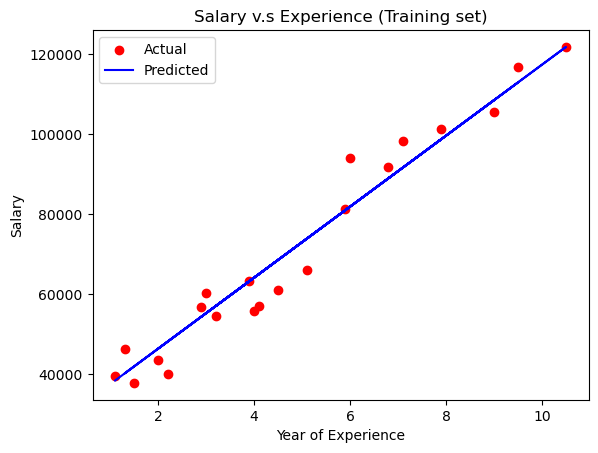

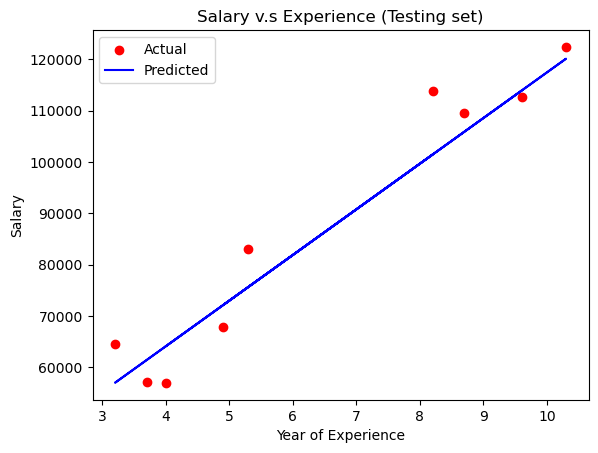

In [418]:
#7 視覺化結果
# 繪製函數
def plot_salary_experience(X, y, y_pred, title='Salary v.s Experience'):
    plt.scatter(X, y, color='red', label='Actual')
    plt.plot(X, y_pred, color='blue', label='Predicted')
    plt.title(title)
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

# 視覺化訓練集
plot_salary_experience(X_train, y_train, y_train_pred, 'Salary v.s Experience (Training set)')
# 視覺化測試集
plot_salary_experience(X_test, y_test, y_test_pred, 'Salary v.s Experience (Testing set)')

可以發現：
- R2 score很高，代表模型很好的擬合了資料
- MSE雖然數值看起來很大，但和原始資料範圍平方比起來還是很小（說明誤差很小）